### About

This notebook is used to practice EDA and Feature Engineering techniques

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import seaborn as sns
import datetime

with open("walmart-sales-dataset-of-45stores.csv", "r") as f:
    data = pd.read_csv(f)

In [2]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
data.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
data.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [6]:
data.shape

(6435, 8)

In [6]:
data.count()

Store           6435
Date            6435
Weekly_Sales    6435
Holiday_Flag    6435
Temperature     6435
Fuel_Price      6435
CPI             6435
Unemployment    6435
dtype: int64

In [7]:
data.value_counts()

Store  Date        Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  CPI         Unemployment
1      01-04-2011  1495064.75    0             59.17        3.524       214.837166  7.682           1
30     30-09-2011  387001.13     0             78.91        3.355       216.362033  7.852           1
31     02-07-2010  1311704.92    0             82.29        2.669       210.880373  8.099           1
       02-04-2010  1357600.68    0             64.12        2.719       210.479887  8.200           1
       02-03-2012  1427881.22    0             59.30        3.630       220.486689  7.057           1
                                                                                                   ..
15     30-12-2011  603460.79     1             31.44        3.566       136.643258  7.866           1
       30-09-2011  521297.31     0             64.87        3.858       136.419500  7.806           1
       30-07-2010  619224.06     0             72.04        2.932       132.598387  8.0

In [8]:
data.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [9]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [10]:
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [11]:
data.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [12]:
data.isna().count()

Store           6435
Date            6435
Weekly_Sales    6435
Holiday_Flag    6435
Temperature     6435
Fuel_Price      6435
CPI             6435
Unemployment    6435
dtype: int64

In [14]:
round(data.describe(), 2)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.00,6435.00,6435.00,6435.00,6435.00,6435.00,6435.00
mean,23.00,1046964.88,0.07,60.66,3.36,171.58,8.00
std,12.99,564366.62,0.26,18.44,0.46,39.36,1.88
min,1.00,209986.25,0.00,-2.06,2.47,126.06,3.88
25%,12.00,553350.10,0.00,47.46,2.93,131.74,6.89
50%,23.00,960746.04,0.00,62.67,3.44,182.62,7.87
75%,34.00,1420158.66,0.00,74.94,3.74,212.74,8.62
max,45.00,3818686.45,1.00,100.14,4.47,227.23,14.31


In [13]:
data.Weekly_Sales.describe(include='all')

count    6.435000e+03
mean     1.046965e+06
std      5.643666e+05
min      2.099862e+05
25%      5.533501e+05
50%      9.607460e+05
75%      1.420159e+06
max      3.818686e+06
Name: Weekly_Sales, dtype: float64

In [15]:
round(data.Weekly_Sales.mean(),2)

1046964.88

In [16]:
data.corr

<bound method DataFrame.corr of       Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

       

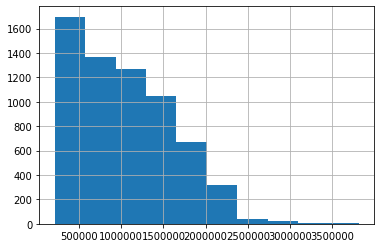

In [17]:
data.Weekly_Sales.hist()

In [32]:
# Let's create a feature to categorize sales.

# Sales under 1 million will be categorized as "Low", Between 1 million and 2 million will be "Moderate", and over 2 million will be "High"

data['Category'] = np.where(data['Weekly_Sales']<1000000, 'Low', (np.where(data['Weekly_Sales']<=2000000,'Moderate','High')))

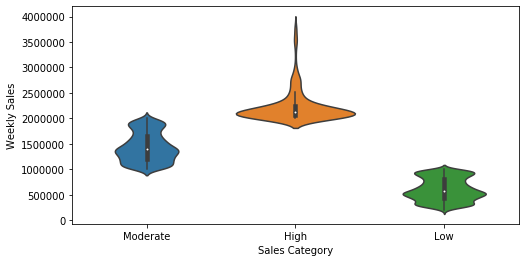

In [33]:
# Overall Sales

fig, ax = plt.subplots(figsize=(8,4))
sns.violinplot(data=data, x='Category', y='Weekly_Sales')
plt.xlabel('Sales Category')
plt.ylabel('Weekly Sales')
plt.show()

### Highlights

In the Low category: the majority of weekly sales are around $500,000

In the Moderate category: the majority of weekly sales are around $1,400,000

In the High category: the majority of weekly sales are around $2,200,000

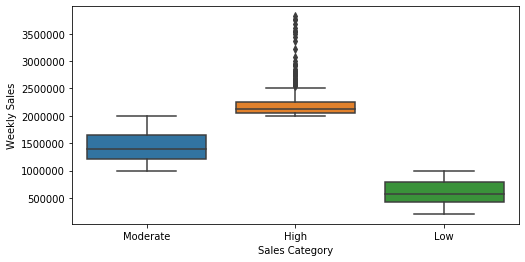

In [35]:
# Same chart using a boxplot

fig, ax = plt.subplots(figsize=(8,4))
sns.boxplot(data=data, x='Category', y='Weekly_Sales')
plt.xlabel('Sales Category')
plt.ylabel('Weekly Sales')
plt.show()

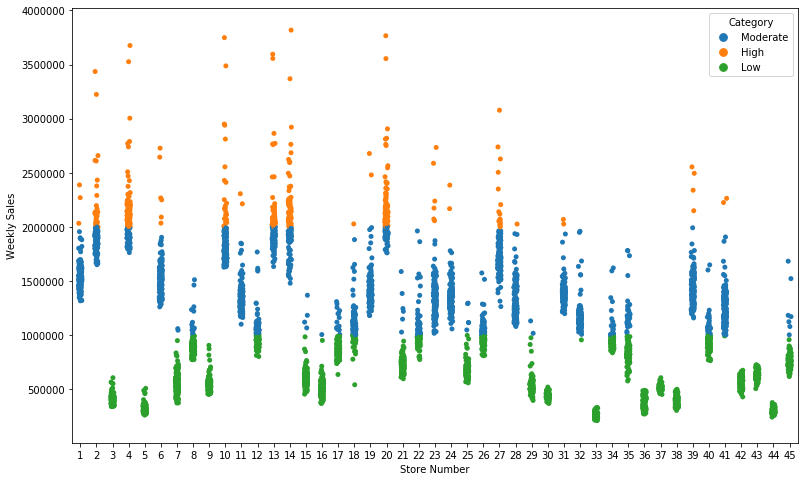

In [36]:
# Display state of sales at each store

fig, ax = plt.subplots(figsize=(13,8))
sns.stripplot(data=data, x='Store', y='Weekly_Sales', hue='Category')
plt.xlabel('Store Number')
plt.ylabel('Weekly Sales')
plt.show()

### The plot above shows that

The sales performance of some stores straddles multiple categories

From low to moderate: 7, 8, 12, 15, 16, 17, 18, 21, 22, 25, 26, 29, 32, 34, 35, 40, 45

From moderate to high: 1, 4, 6, 10, 11,13, 14, 18, 20, 23, 24, 27, 28, 31, 39, 41

Some stores had persistently low weekly sales: 3, 5, 30, 33, 36, 37, 38, 42, 43, 44

By contrast, there were no stores with only moderate or high weekly sales

The sales of store 18 transitioned through all 3 sales categories.

In [37]:
# Let's plot some of these cases
df_3 = data[data['Store'] == 3]
df_14 = data[data['Store'] == 14]
df_18 = data[data['Store'] == 18]
df_35 = data[data['Store'] == 35]

# Create a dataframe of the holidays
df_holiday = data.loc[data['Holiday_Flag'] == 1]

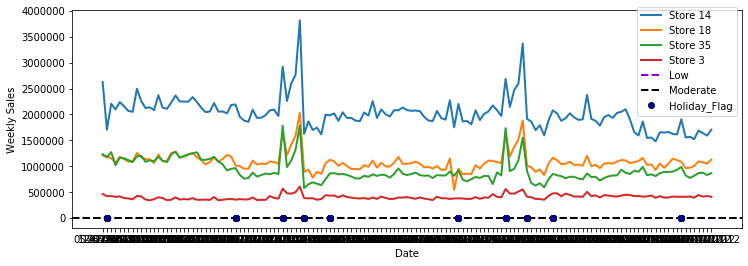

In [38]:
# Plot the cases
fig, ax = plt.subplots(figsize=(12,4))
plt.plot('Date', 'Weekly_Sales', data=df_14, label='Store 14', linewidth=2)
plt.plot('Date', 'Weekly_Sales', data=df_18, label='Store 18', linewidth=2)
plt.plot('Date', 'Weekly_Sales', data=df_35, label='Store 35', linewidth=2)
plt.plot('Date', 'Weekly_Sales', data=df_3, label='Store 3', linewidth=2)
plt.axhline(y=10, color='darkviolet', linestyle='--', label='Low', linewidth=2)
plt.axhline(y=20, color='black', linestyle='--', label='Moderate', linewidth=2)
plt.plot('Date', 'Holiday_Flag', data=df_holiday, marker='o', linestyle='', color = 'navy')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend(bbox_to_anchor=(1,1.04))

plt.show()

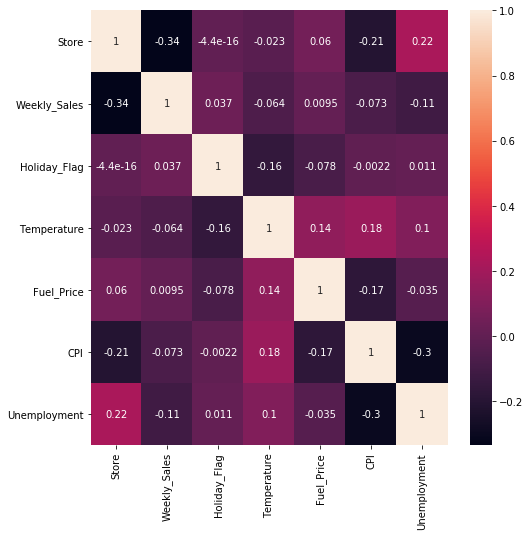

In [27]:
# Check correlations
correlation = data.corr('pearson')

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(correlation, annot=True)
plt.show()

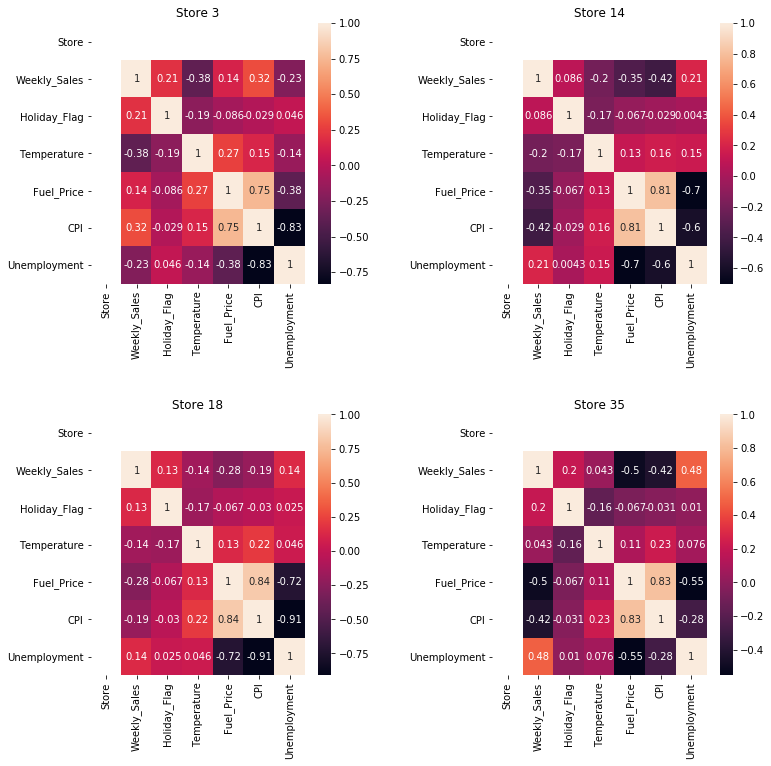

In [31]:
# The correlations with other data are low. But what if we focus on specific stores?

fig, ax = plt.subplots(figsize = (12,12))
plt.gcf().subplots_adjust(hspace=0.5, wspace=0.5)

plt.subplot(2,2,1)
correlation_3 = df_3.corr('pearson')
sns.heatmap(correlation_3, annot=True)
plt.title('Store 3')

plt.subplot(2,2,2)
correlation_14 = df_14.corr('pearson')
sns.heatmap(correlation_14, annot=True)
plt.title('Store 14')

plt.subplot(2,2,3)
correlation_18 = df_18.corr('pearson')
sns.heatmap(correlation_18, annot=True)
plt.title('Store 18')

plt.subplot(2,2,4)
correlation_35 = df_35.corr('pearson')
sns.heatmap(correlation_35, annot=True)
plt.title('Store 35')
plt.show()

The plot above shows that correlations change when individual stores are considered.

For Store 3, the correlation between weekly sales and consumer price index (CPI) increased to 0.32

The correlation for fuel price increased

For Stores 14 and 18, the correlation between CPI, unemployment, and fuel price increased more than 2 fold

The correlation between weekly sales and unemployment is highest at store 35

In [100]:
pd.set_option('display.max_rows', None)
data.head(1000)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.57,211.10,8.11
1,1,12-02-2010,1641957.44,1,38.51,2.55,211.24,8.11
2,1,19-02-2010,1611968.17,0,39.93,2.51,211.29,8.11
3,1,26-02-2010,1409727.59,0,46.63,2.56,211.32,8.11
4,1,05-03-2010,1554806.68,0,46.50,2.62,211.35,8.11
5,1,12-03-2010,1439541.59,0,57.79,2.67,211.38,8.11
6,1,19-03-2010,1472515.79,0,54.58,2.72,211.22,8.11
7,1,26-03-2010,1404429.92,0,51.45,2.73,211.02,8.11
8,1,02-04-2010,1594968.28,0,62.27,2.72,210.82,7.81
9,1,09-04-2010,1545418.53,0,65.86,2.77,210.62,7.81


In [101]:
data.Store.value_counts()

1     143
24    143
26    143
27    143
28    143
29    143
30    143
31    143
32    143
33    143
34    143
35    143
36    143
37    143
38    143
39    143
40    143
41    143
42    143
43    143
44    143
25    143
23    143
2     143
22    143
3     143
4     143
5     143
6     143
7     143
8     143
9     143
10    143
11    143
12    143
13    143
14    143
15    143
16    143
17    143
18    143
19    143
20    143
21    143
45    143
Name: Store, dtype: int64

In [102]:
#data.Store.value_counts().sort_index()

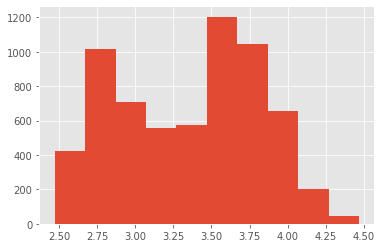

In [103]:
# Histogram of fuel prices
data.Fuel_Price.hist()

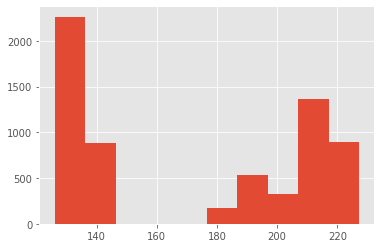

In [104]:
# Histogram of CPI readings
data.CPI.hist(bins=10)

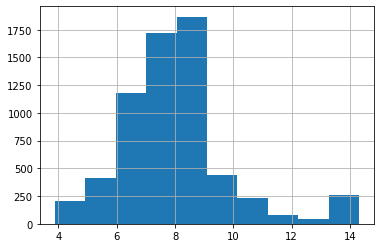

In [18]:
# Histogram of Unemployment figures
data.Unemployment.hist()

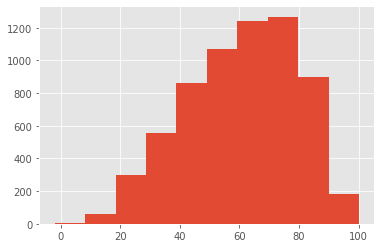

In [106]:
# Histogram of Temperature
data.Temperature.hist()

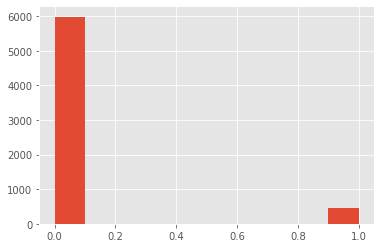

In [107]:
# Histogram of Holiday Flags
data.Holiday_Flag.hist()

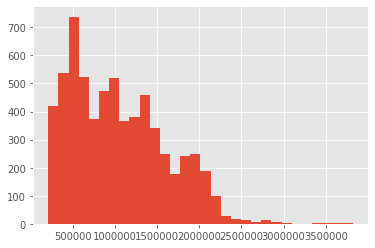

In [108]:
# Histogram of Weekly Sales figures
data.Weekly_Sales.hist(bins=30)

In [109]:
#for col in ['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']:
#    sns.countplot(data[col])
#    plt.title(col)
#    plt.xticks(rotation=60)
#    plt.show()

In [110]:
# Checking unique dates to ensure conformity to format
data['Date'].unique()

array(['05-02-2010', '12-02-2010', '19-02-2010', '26-02-2010',
       '05-03-2010', '12-03-2010', '19-03-2010', '26-03-2010',
       '02-04-2010', '09-04-2010', '16-04-2010', '23-04-2010',
       '30-04-2010', '07-05-2010', '14-05-2010', '21-05-2010',
       '28-05-2010', '04-06-2010', '11-06-2010', '18-06-2010',
       '25-06-2010', '02-07-2010', '09-07-2010', '16-07-2010',
       '23-07-2010', '30-07-2010', '06-08-2010', '13-08-2010',
       '20-08-2010', '27-08-2010', '03-09-2010', '10-09-2010',
       '17-09-2010', '24-09-2010', '01-10-2010', '08-10-2010',
       '15-10-2010', '22-10-2010', '29-10-2010', '05-11-2010',
       '12-11-2010', '19-11-2010', '26-11-2010', '03-12-2010',
       '10-12-2010', '17-12-2010', '24-12-2010', '31-12-2010',
       '07-01-2011', '14-01-2011', '21-01-2011', '28-01-2011',
       '04-02-2011', '11-02-2011', '18-02-2011', '25-02-2011',
       '04-03-2011', '11-03-2011', '18-03-2011', '25-03-2011',
       '01-04-2011', '08-04-2011', '15-04-2011', '22-04

In [111]:
# Let's convert the date column to a Datetime object and engineer some date features
data['Date']=pd.to_datetime(data['Date'], dayfirst=True, format = '%d-%m-%Y')
data['Year']=data['Date'].dt.year
data['Month']=data['Date'].dt.month
data['Day']=data['Date'].dt.day
data['MonthYear_value']=data['Date'].dt.to_period('M')
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,MonthYear_value
0,1,2010-02-05,1643690.90,0,42.31,2.57,211.10,8.11,2010,2,5,2010-02
1,1,2010-02-12,1641957.44,1,38.51,2.55,211.24,8.11,2010,2,12,2010-02
2,1,2010-02-19,1611968.17,0,39.93,2.51,211.29,8.11,2010,2,19,2010-02
3,1,2010-02-26,1409727.59,0,46.63,2.56,211.32,8.11,2010,2,26,2010-02
4,1,2010-03-05,1554806.68,0,46.50,2.62,211.35,8.11,2010,3,5,2010-03


### Error Report

#### I ran into an error here which pointed to the first line and said "ValueError: unconverted data remains: 10"

At first I had to research whether or not this meant 10 rows could not be converted or if the value that was throwing the error was "10".

Once I realized that it was the value, I attempted several remediation methods including strftime and strptime as well as used data['Date'].unique() to check that the data had been properly cleaned and was in the correct format for parsing.

After eliminating that possibility I checked each step that preceded my datetime conversion to see if any of the steps I took may have contributed to the problem. Finally, once I was sure that neither approach contributed to the issue, I determined that there must be a syntax error.

After carefully reading the input and cross-referencing it with syntax from the documentation, I discovered that the error came from having used a lower case 'y' when it should have been 'Y' (%y vs. %Y). 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb9757961d0>,
      dtype=object)

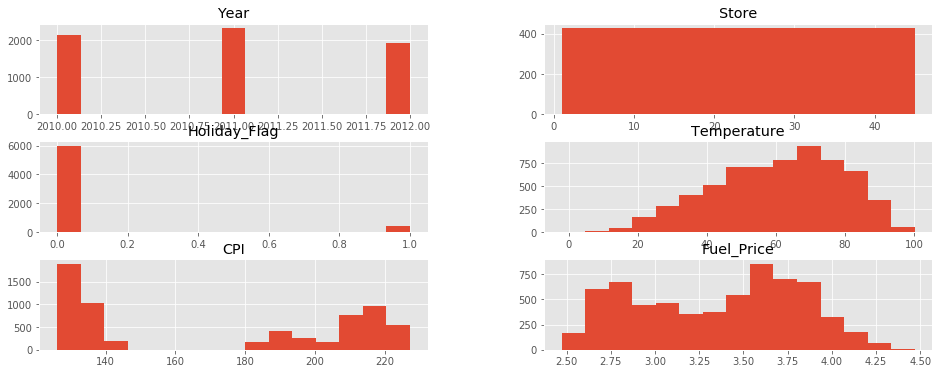

In [112]:
# Plotting some more histograms using different syntax for practice
data[['Year', 'Store', 'Holiday_Flag', 'Temperature', 'CPI', 'Fuel_Price']].hist(bins=15, figsize=(16,6))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb977a5b450>],
      dtype=object)

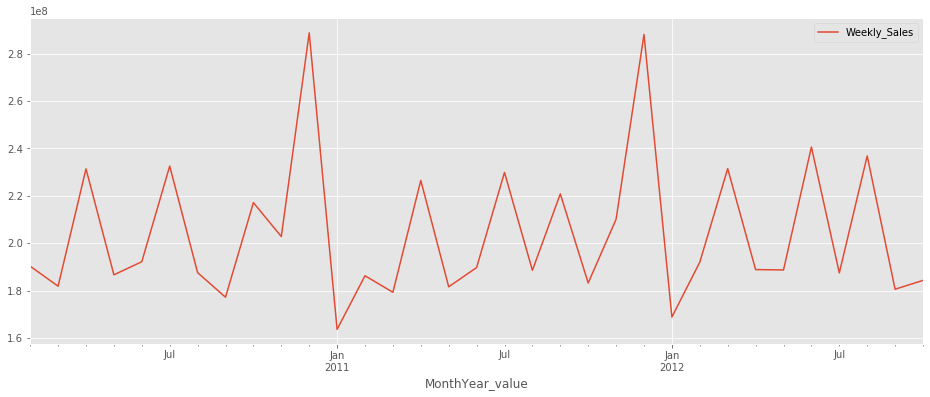

In [113]:
# Creating a line graph of sales grouping by the month + year feature we engineered earlier
sales_year=data.groupby(['MonthYear_value']).sum()
sales_year[['Weekly_Sales']].plot(figsize=(16,6), subplots=True)

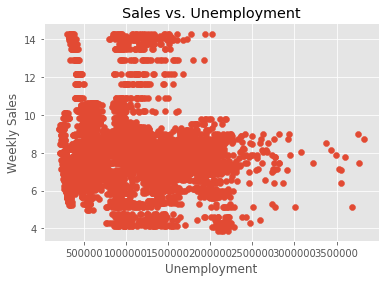

In [114]:
# Scatterplot of Weekly Sales vs. Unemployment
plt.scatter(data['Weekly_Sales'],data['Unemployment'])
fig, ax = (16,6)
plt.xlabel('Unemployment')
plt.ylabel('Weekly Sales')
plt.title('Sales vs. Unemployment')
plt.show()

In [115]:
data['Year'].value_counts()

2011    2340
2010    2160
2012    1935
Name: Year, dtype: int64

In [116]:
# Creating dataframes for individual years
sales2010 = pd.DataFrame(data[data['Year']==2010])
sales2011 = pd.DataFrame(data[data['Year']==2011])
sales2012 = pd.DataFrame(data[data['Year']==2012])

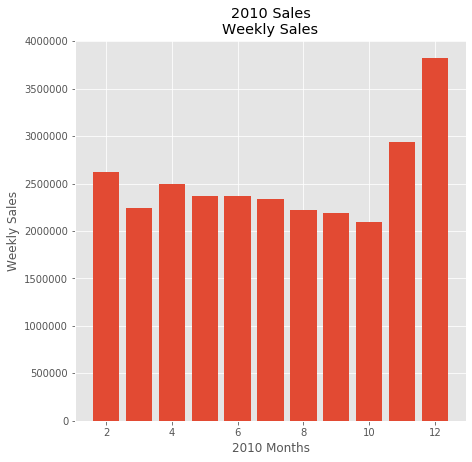

In [117]:
# Create Figure and Plot space
plt.style.use("ggplot")
 
fig, ax = plt.subplots(figsize=(7, 7))

# Create X and Y axes
ax.bar(sales2010['Month'],
      sales2010['Weekly_Sales'])

# Set Title and Label for axes
ax.set(xlabel="2010 Months",
      ylabel="Weekly Sales",
      title="2010 Sales\nWeekly Sales")

plt.show()

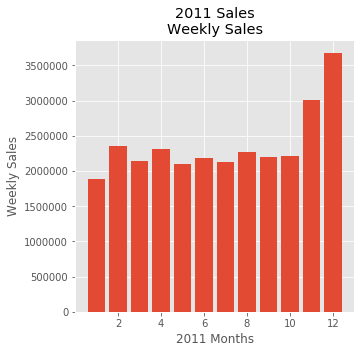

In [118]:
# Create Figure and Plot space
plt.style.use("ggplot")
 
fig, ax = plt.subplots(figsize=(5, 5))

# Create X and Y axes
ax.bar(sales2011['Month'],
      sales2011['Weekly_Sales'])

# Set Title and Label for axes
ax.set(xlabel="2011 Months",
      ylabel="Weekly Sales",
      title="2011 Sales\nWeekly Sales")

plt.show()

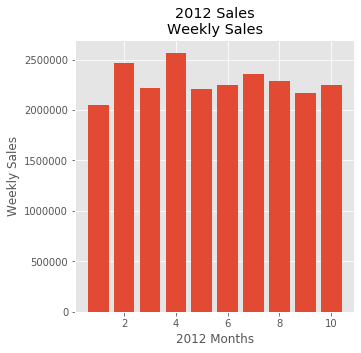

In [119]:
# Create Figure and Plot space
plt.style.use("ggplot")
 
fig, ax = plt.subplots(figsize=(5, 5))

# Create X and Y axes
ax.bar(sales2012['Month'],
      sales2012['Weekly_Sales'])

# Set Title and Label for axes
ax.set(xlabel="2012 Months",
      ylabel="Weekly Sales",
      title="2012 Sales\nWeekly Sales")

plt.show()

In [120]:
# Let's create proper holiday names for the holiday flags in a new column
superBowl = ['2010-02-12', '2011-02-11', '2012-02-10']
memorialDay = ['2010-06-04', '2011-06-03', '2012-06-01']
independenceDay = ['2010-07-09', '2011-07-08', '2012-07-06']
laborDay = ['2010-09-10', '2011-09-09', '2012-09-09']
thanksgiving = ['2010-11-26', '2011-12-02']
christmas = ['2010-12-31', '2011-12-30']
newYears = ['2011-01-07', '2012-01-06']

def holidays(x):
    if str(x)[:10] in superBowl:
        return 'Super Bowl'
    elif str(x)[:10] in memorialDay:
        return 'Memorial Day'
    elif str(x)[:10] in independenceDay:
        return 'July 4th'
    elif str(x)[:10] in laborDay:
        return 'Labor Day'
    elif str(x)[:10] in thanksgiving:
        return 'Thanksgiving'
    elif str(x)[:10] in christmas:
        return 'Christmas'
    elif str(x)[:10] in newYears:
        return 'New Years Eve'
    else:
        return 'No Holiday'
    
data['Holiday'] = data['Date'].apply(holidays) 

In [121]:
data.head(160)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,MonthYear_value,Holiday
0,1,2010-02-05,1643690.90,0,42.31,2.57,211.10,8.11,2010,2,5,2010-02,No Holiday
1,1,2010-02-12,1641957.44,1,38.51,2.55,211.24,8.11,2010,2,12,2010-02,Super Bowl
2,1,2010-02-19,1611968.17,0,39.93,2.51,211.29,8.11,2010,2,19,2010-02,No Holiday
3,1,2010-02-26,1409727.59,0,46.63,2.56,211.32,8.11,2010,2,26,2010-02,No Holiday
4,1,2010-03-05,1554806.68,0,46.50,2.62,211.35,8.11,2010,3,5,2010-03,No Holiday
5,1,2010-03-12,1439541.59,0,57.79,2.67,211.38,8.11,2010,3,12,2010-03,No Holiday
6,1,2010-03-19,1472515.79,0,54.58,2.72,211.22,8.11,2010,3,19,2010-03,No Holiday
7,1,2010-03-26,1404429.92,0,51.45,2.73,211.02,8.11,2010,3,26,2010-03,No Holiday
8,1,2010-04-02,1594968.28,0,62.27,2.72,210.82,7.81,2010,4,2,2010-04,No Holiday
9,1,2010-04-09,1545418.53,0,65.86,2.77,210.62,7.81,2010,4,9,2010-04,No Holiday


### Technique report

In engineering this feature, I had to first look up the date of the holiday in its particular year and then ensure that I choose the week *after* the date in order to ensure that sales for the holiday were accounted for. The initial data set came with a Holiday Flag column so it was easy to confirm that this is how the data are set up.



In [122]:
# Examining the Weekly Sales of Stores using various aggregators
df1 = data.groupby(['Store'])[['Weekly_Sales']].sum()
df1.head()

,Weekly_Sales
Store,
1,222402808.85
2,275382440.98
3,57586735.07
4,299543953.38
5,45475688.90


In [123]:
df2 = data.groupby(['Store'])[['Weekly_Sales']].min()
df2.head()

,Weekly_Sales
Store,
1,1316899.31
2,1650394.44
3,339597.38
4,1762539.30
5,260636.71


In [124]:
df3 = data.groupby(['Store'])[['Weekly_Sales']].max()
df3.head()

,Weekly_Sales
Store,
1,2387950.20
2,3436007.68
3,605990.41
4,3676388.98
5,507900.07


In [125]:
df4 = data.groupby(['Store'])[['Weekly_Sales']].median()
df4.head()

,Weekly_Sales
Store,
1,1534849.64
2,1879107.31
3,395107.35
4,2073951.38
5,310338.17


In [126]:
# Examining the Weekly Sales of Stores using multiple aggregators in one dataframe
df5 = data.groupby(['Store'])[['Weekly_Sales']].agg(['mean', 'min', 'max'])
df5.head()

Weekly_Sales                      
              mean        min        max
Store                                   
1       1555264.40 1316899.31 2387950.20
2       1925751.34 1650394.44 3436007.68
3        402704.44  339597.38  605990.41
4       2094712.96 1762539.30 3676388.98
5        318011.81  260636.71  507900.07

In [127]:
# Examining the Weekly Sales of Stores using a dictionary technique to aggregate
df6 = data.groupby(['Store', 'Year']).agg({'Weekly_Sales': 'sum'}).reset_index().sort_values(by = 'Weekly_Sales', ascending = False)
df6

,Store,Year,Weekly_Sales
10,4,2011,111092293.33
58,20,2011,109837002.36
40,14,2011,106096270.70
39,14,2010,105462242.38
37,13,2011,104537513.33
57,20,2010,101733080.72
28,10,2011,98916894.74
4,2,2011,98607881.42
9,4,2010,95680470.81
3,2,2010,95277864.19


In [128]:
# Assigning new columns to the above dataframe to properly label the Annual Sales
new_cols_df6 = ['Store', 'Year', 'Annual Sales']
df6.columns = new_cols_df6

In [130]:
df6.sort_values(by = ['Year', 'Annual Sales'], ascending = False, inplace = True)

In [131]:
pd.set_option('display.float_format', lambda x: '%.2f' %x)
df6

,Store,Year,Annual Sales
11,4,2012,92771189.24
59,20,2012,89827709.38
38,13,2012,86707455.02
5,2,2012,81496695.37
29,10,2012,78228616.94
41,14,2012,77441398.26
80,27,2012,71920056.12
2,1,2012,68202058.02
17,6,2012,66315047.00
116,39,2012,65885662.85


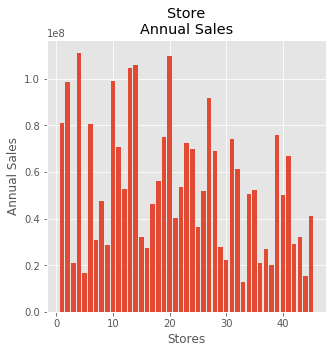

In [132]:
plt.style.use("ggplot")
 
fig, ax = plt.subplots(figsize=(5, 5))

# Create X and Y axes
ax.bar(df6['Store'],
      df6['Annual Sales'])

# Set Title and Label for axes
ax.set(xlabel="Stores",
      ylabel="Annual Sales",
      title="Store\nAnnual Sales")

plt.show()

In [133]:
df7 = data.groupby(['Store']).agg({'Weekly_Sales': 'sum'}).reset_index().sort_values(by = 'Weekly_Sales', ascending = False)
print("Top 10 Store With Highest Weekly Sales")
df7.head(10)

Top 10 Store With Highest Weekly Sales


,Store,Weekly_Sales
19,20,301397792.46
3,4,299543953.38
13,14,288999911.34
12,13,286517703.80
1,2,275382440.98
9,10,271617713.89
26,27,253855916.88
5,6,223756130.64
0,1,222402808.85
38,39,207445542.47


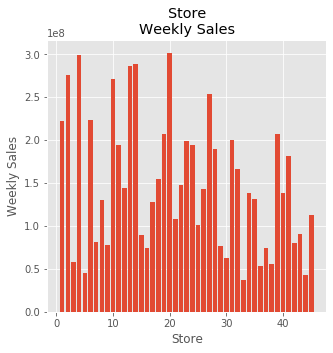

In [134]:
plt.style.use('ggplot')

fig, ax = (plt.subplots(figsize = (5, 5)))

# Create X and Y axes
ax.bar(df7['Store'],
      df7['Weekly_Sales'])

# Set Title and Label for axes
ax.set(xlabel='Store',
      ylabel='Weekly Sales',
      title='Store\nWeekly Sales')

plt.show()

In [135]:
# Creating a dataframe displaying the standard deviation of Weekly Sales
df_std = data.groupby(['Store']).agg({'Weekly_Sales': 'std'}).reset_index()

df_std.columns = ['Store', 'STD_of_Weekly_Sales']
df_std.sort_values(by = 'STD_of_Weekly_Sales', inplace = True, ascending = False)

df_std.head()

,Store,STD_of_Weekly_Sales
13,14,317569.95
9,10,302262.06
19,20,275900.56
3,4,266201.44
12,13,265507.00


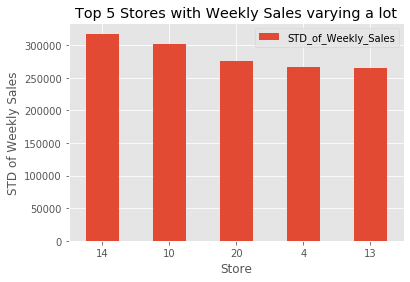

In [136]:
# Plotting the Stores with the highest standard deviation in sales
df_std.set_index('Store').head().plot(kind = 'bar')

plt.xlabel("Store")
plt.ylabel("STD of Weekly Sales")
plt.title("Top 5 Stores with Weekly Sales varying a lot")
plt.tick_params(labelrotation = 0, axis = 'x')
plt.show()

In [137]:
# Creating the same dataframe but on an annual basis
df_std_yearly = data.groupby(['Store', 'Year']).agg({'Weekly_Sales': 'std'}).reset_index()

df_std_yearly.columns = ['Store', 'Year', 'STD_of_Weekly_Sales']
df_std_yearly.sort_values(by = 'STD_of_Weekly_Sales', inplace = True, ascending = False)

df_std_yearly.head()

,Store,Year,STD_of_Weekly_Sales
27,10,2010,366059.64
39,14,2010,336759.64
57,20,2010,335859.87
28,10,2011,324215.95
36,13,2010,318291.32


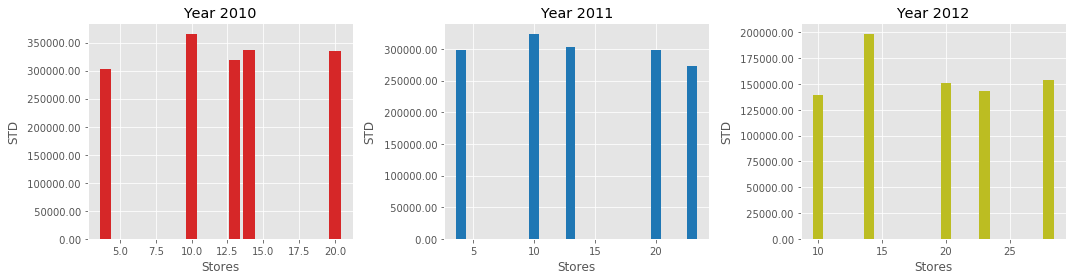

In [138]:
# Plotting the annualized standard deviation stores
# Prepare Data
years = df_std_yearly.Year.unique()
years = sorted(years)

mycolors = ['tab:red', 'tab:blue', 'tab:olive']

# Plot
fig, ax = plt.subplots(1, len(years), sharey = False, figsize = (15, 4))

for i,j in enumerate(years):
    
    data = df_std_yearly[df_std_yearly['Year'] == j].sort_values(by = ['STD_of_Weekly_Sales'], ascending = False).head()
    
    ax[i].bar(data['Store'], data['STD_of_Weekly_Sales'], color = mycolors[i])
    
    # Labels
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('% 1.2f'))
    ax[i].set(xlabel = 'Stores')
    ax[i].set(ylabel = 'STD')
    ax[i].set(title = 'Year ' + str(j))
    ax[i].tick_params(labelrotation = 0, axis = 'x')
    
plt.tight_layout()
plt.show()
    